## Load Some Images

In [1]:
from PIL import Image
import torch
from torchvision import transforms
import numpy as np
from glob import glob

In [2]:
image_files = glob('data/random/*')

images = [Image.open(f) for f in image_files]

## Load Pre-trained Squeezenet

In [3]:
import torchvision
import torchvision.models as models

In [4]:
squeezenet1_0 = torchvision.models.squeezenet1_0(pretrained=True, progress=True)
squeezenet1_0.to('cuda')

SqueezeNet(
  (features): Sequential(
    (0): Conv2d(3, 96, kernel_size=(7, 7), stride=(2, 2))
    (1): ReLU(inplace=True)
    (2): MaxPool2d(kernel_size=3, stride=2, padding=0, dilation=1, ceil_mode=True)
    (3): Fire(
      (squeeze): Conv2d(96, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (4): Fire(
      (squeeze): Conv2d(128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace=True)
      (expand1x1): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace=True)
      (expand3x3): Conv2d(16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace=True)
    )
    (5): Fire(
   

In [5]:
# it looks like the only interesting dropout layer above is classifier:0, so we want to agument on classifier:1

squeezenet1_0.classifier[1]

Conv2d(512, 1000, kernel_size=(1, 1), stride=(1, 1))

## Do Augmentation

In [6]:
import dropviz
import matplotlib.pyplot as plt

In [7]:
# turn of ticks because we are only plotting images
plt.rcParams['xtick.bottom'] = False
plt.rcParams['xtick.labelbottom'] = False
plt.rcParams['ytick.left'] = False
plt.rcParams['ytick.labelleft'] = False

In [8]:
#  https://pytorch.org/hub/pytorch_vision_alexnet/
  
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])

In [9]:
# utilities for converting the normalized images into displayable ones

def denorm(image):
    mean = [0.485, 0.456, 0.406]
    std = [0.229, 0.224, 0.225]
    image = image * std
    image = image + mean
    return image

def fix_image(image):
    if torch.is_tensor(image):
        image = image.numpy()
    image = image.reshape(3, 224, 224)
    image = image.transpose(1, 2, 0)
    image = denorm(image)
    return image

Epoch 1, loss 107.34154510498047
Epoch 1001, loss 71.32327270507812
Epoch 2001, loss 66.33270263671875
Epoch 3001, loss 62.40060043334961
Epoch 4001, loss 59.74276351928711


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 57.37276840209961


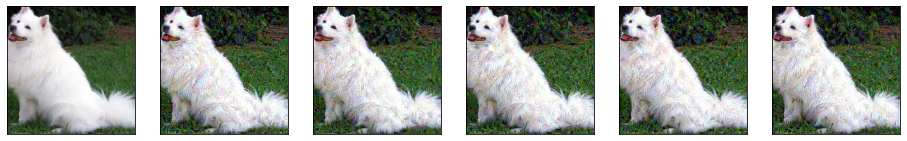

Epoch 1, loss 101.70223999023438
Epoch 1001, loss 71.85636138916016
Epoch 2001, loss 67.315673828125
Epoch 3001, loss 63.58705139160156
Epoch 4001, loss 61.201316833496094


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 59.08793640136719


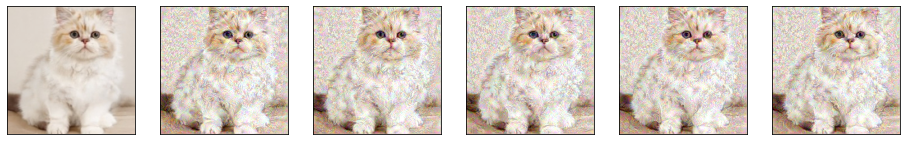

Epoch 1, loss 54.09065246582031
Epoch 1001, loss 35.58790969848633
Epoch 2001, loss 32.532493591308594
Epoch 3001, loss 30.529752731323242
Epoch 4001, loss 28.949819564819336


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 27.610708236694336


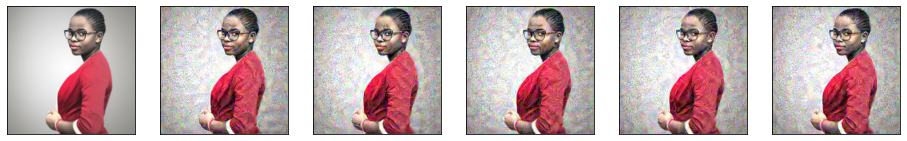

Epoch 1, loss 78.7188949584961
Epoch 1001, loss 50.866878509521484
Epoch 2001, loss 46.128292083740234
Epoch 3001, loss 42.84162139892578
Epoch 4001, loss 40.492706298828125


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Final loss 38.40082550048828


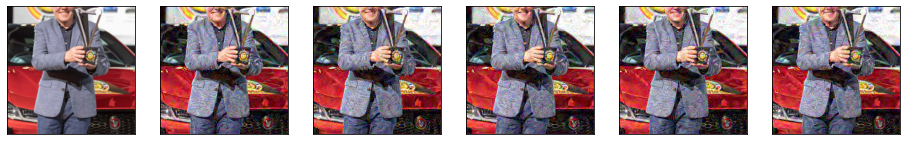

In [10]:
for image in images:
    
    # preprocess input
    input_tensor = preprocess(image)
    input_batch = input_tensor.unsqueeze(0)
    
    # augment
    corrupted_images, output = dropviz.augment(squeezenet1_0, squeezenet1_0.classifier[1], 'cuda', input_batch, 
                                               5, 5000, 0.01, 0.0001, verbosity=1)

    # plot
    fig, ax = plt.subplots(1, len(corrupted_images)+1, figsize=(16,20))

    ax[0].imshow(fix_image(input_batch))
    for n in range(len(corrupted_images)):
        ax[n+1].imshow(fix_image(corrupted_images[n]))
    plt.show()

## Verify Model Predictions

Check the predictions for the last image used. These are predictions made with dropout on the original image vs the augmentations, so we will have several different plots but they should be somewhat similar.

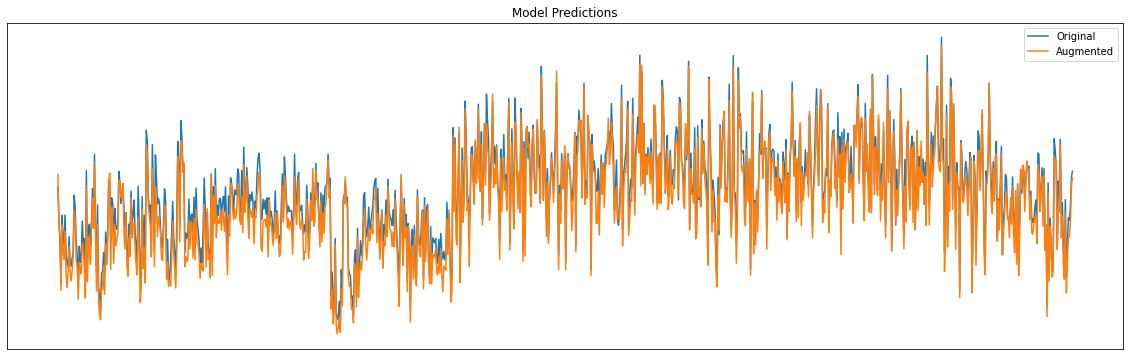

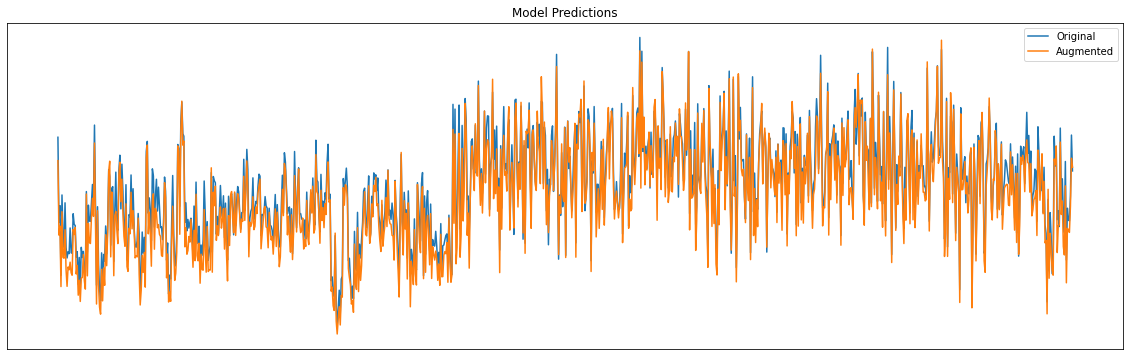

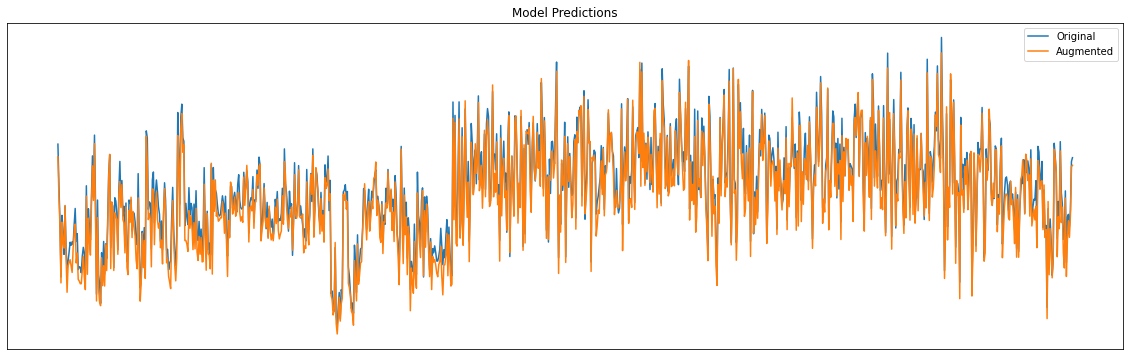

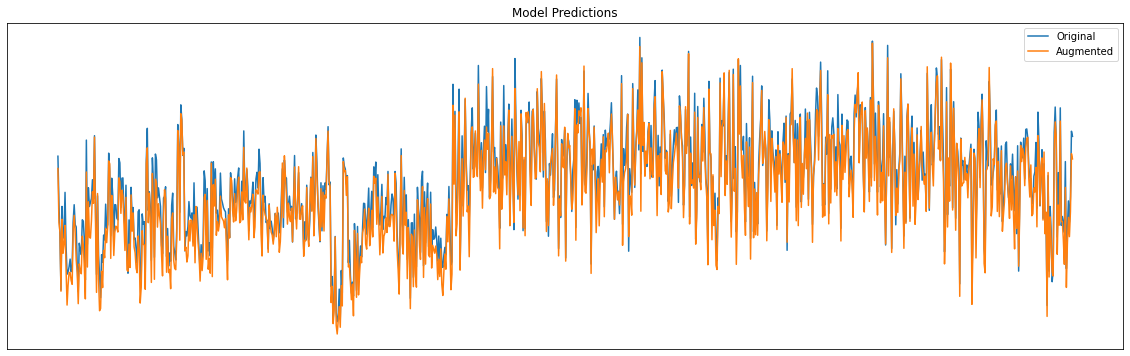

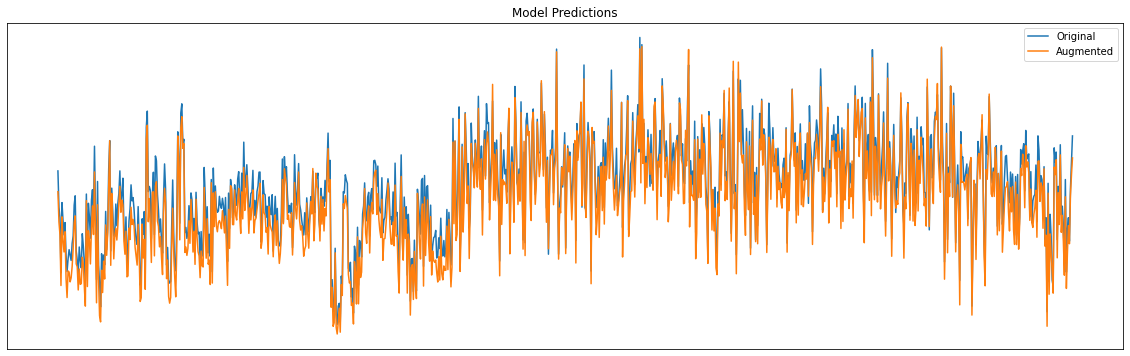

In [13]:
for j in range(len(output[0])):
    plt.figure(figsize=(20, 6))
    plt.plot(output[0][j], label='Original')
    plt.plot(output[1][j], label='Augmented')
    plt.title("Model Predictions")
    plt.legend();